In [1]:
#importation of libraries
import numpy as np #used for data manipulation
import pandas as pd #used for data manipulation
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #used for data visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 5)
plt.rcParams['hatch.linewidth'] = 2.0 


import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
#creating a variable to read the csv file 
df=pd.read_csv(r"C:\Users\HP 2022\Downloads\flights.csv")
airlines=pd.read_csv(r"C:\Users\HP 2022\Downloads\airlines.csv")
airports=pd.read_csv(r"C:\Users\HP 2022\Downloads\airports.csv")
pd.set_option('display.max_columns', None) #displayed all the columns
df.head(15)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,1589,604.0,6.0,602,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,1299,504.0,5.0,526,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,44.0,14.0,13.0,57.0,273.0,249.0,228.0,2125,745.0,8.0,803,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,1464,529.0,3.0,545,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
df.shape, airports.shape, airlines.shape

((1048575, 31), (322, 7), (14, 2))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [7]:
print(df.isnull().sum()) #checking for the sum of null values 

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER               7750
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           39515
DEPARTURE_DELAY          39515
TAXI_OUT                 40229
WHEELS_OFF               40229
SCHEDULED_TIME               2
ELAPSED_TIME             43071
AIR_TIME                 43071
DISTANCE                     0
WHEELS_ON                41296
TAXI_IN                  41296
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             41296
ARRIVAL_DELAY            43071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    1008048
AIR_SYSTEM_DELAY        820047
SECURITY_DELAY          820047
AIRLINE_DELAY           820047
LATE_AIRCRAFT_DELAY     820047
WEATHER_DELAY           820047
dtype: int64


In [8]:
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

In [9]:
# examing the missing value
missing_df = df.isnull().sum(axis=0).reset_index() # Calculate the number of NaN values in each column
missing_df.columns = ['variable', 'missing values'] # Rename the columns of the resulting DataFrame
missing_df['filling factor (%)']=(df.shape[0]-missing_df['missing values'])/df.shape[0]*100 # Calculate the percentage of missing values in each column
missing_df.sort_values('filling factor (%)').reset_index(drop = True) # Sort the resulting DataFrame by the percentage of missing values in descending order

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,1008048,3.864960
1,LATE_AIRCRAFT_DELAY,820047,21.794149
2,AIRLINE_DELAY,820047,21.794149
3,SECURITY_DELAY,820047,21.794149
4,AIR_SYSTEM_DELAY,820047,21.794149
5,WEATHER_DELAY,820047,21.794149
6,ELAPSED_TIME,43071,95.892425
7,AIR_TIME,43071,95.892425
8,ARRIVAL_DELAY,43071,95.892425
9,WHEELS_ON,41296,96.061703


In [10]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'DATE'],
      dtype='object')

In [11]:
df1=df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
        'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
        'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
        'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
        'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','DATE','CANCELLATION_REASON','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   YEAR                 1048575 non-null  int64         
 1   MONTH                1048575 non-null  int64         
 2   DAY                  1048575 non-null  int64         
 3   DAY_OF_WEEK          1048575 non-null  int64         
 4   AIRLINE              1048575 non-null  object        
 5   FLIGHT_NUMBER        1048575 non-null  int64         
 6   TAIL_NUMBER          1040825 non-null  object        
 7   ORIGIN_AIRPORT       1048575 non-null  object        
 8   DESTINATION_AIRPORT  1048575 non-null  object        
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64         
 10  DEPARTURE_TIME       1009060 non-null  float64       
 11  DEPARTURE_DELAY      1009060 non-null  float64       
 12  TAXI_OUT             1008346 non-null  float64       
 1

In [13]:
 df=df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
        'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
        'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
        'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
        'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','DATE']]

In [14]:
# df['TAIL_NUMBER'].fillna(df['TAIL_NUMBER'].mode()[0], inplace=True)
# df['DEPARTURE_TIME'].fillna(df['DEPARTURE_TIME'].median(), inplace=True)
# df['DEPARTURE_DELAY'].fillna(df['DEPARTURE_DELAY'].median(), inplace=True)
# df['TAXI_OUT'].fillna(df['TAXI_OUT'].median(), inplace=True)
# df['WHEELS_OFF'].fillna(df['WHEELS_OFF'].median(), inplace=True)
# df['SCHEDULED_TIME'].fillna(df['SCHEDULED_TIME'].median(), inplace=True)
# df['ELAPSED_TIME'].fillna(df['ELAPSED_TIME'].median(), inplace=True)
# df['AIR_TIME'].fillna(df['AIR_TIME'].median(), inplace=True)
# df['WHEELS_ON'].fillna(df['WHEELS_ON'].median(), inplace=True)
# df['TAXI_IN'].fillna(df['TAXI_IN'].median(), inplace=True)
# df['ARRIVAL_TIME'].fillna(df['ARRIVAL_TIME'].median(), inplace=True)
df1['ARRIVAL_DELAY'].fillna(df1['ARRIVAL_DELAY'].median(), inplace=True)
df1['CANCELLATION_REASON'].fillna(df1['CANCELLATION_REASON'].mode()[0], inplace=True)
# df['AIR_SYSTEM_DELAY'].fillna(df['AIR_SYSTEM_DELAY'].median(), inplace=True)
# df['SECURITY_DELAY'].fillna(df['SECURITY_DELAY'].median(), inplace=True)
# df['AIRLINE_DELAY'].fillna(df['AIRLINE_DELAY'].median(), inplace=True)
# df['LATE_AIRCRAFT_DELAY'].fillna(df['LATE_AIRCRAFT_DELAY'].median(), inplace=True)
# df['WEATHER_DELAY'].fillna(df['WEATHER_DELAY'].median(), inplace=True)




In [15]:
# remove missing values
df.dropna(inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005504 entries, 0 to 1048573
Data columns (total 26 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   YEAR                 1005504 non-null  int64         
 1   MONTH                1005504 non-null  int64         
 2   DAY                  1005504 non-null  int64         
 3   DAY_OF_WEEK          1005504 non-null  int64         
 4   AIRLINE              1005504 non-null  object        
 5   FLIGHT_NUMBER        1005504 non-null  int64         
 6   TAIL_NUMBER          1005504 non-null  object        
 7   ORIGIN_AIRPORT       1005504 non-null  object        
 8   DESTINATION_AIRPORT  1005504 non-null  object        
 9   SCHEDULED_DEPARTURE  1005504 non-null  int64         
 10  DEPARTURE_TIME       1005504 non-null  float64       
 11  DEPARTURE_DELAY      1005504 non-null  float64       
 12  TAXI_OUT             1005504 non-null  float64       
 1

In [17]:
df.describe(include='object')

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT
count,1005504,1005504,1005504,1005504
unique,14,4518,315,315
top,WN,N477HA,ATL,ATL
freq,214483,809,65017,65157


In [18]:
df.describe(exclude='object')

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
count,1005504.0,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1.005504e+06,1005504.0,1005504.0,1005504
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-09 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16710
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-10 00:00:00
mean,2015.0,1.685546e+00,1.384900e+01,3.966488e+00,2.243120e+03,1.322630e+03,1.333695e+03,1.123649e+01,1.664477e+01,1.357440e+03,1.405624e+02,1.369381e+02,1.127477e+02,8.069146e+02,1.485989e+03,7.545650e+00,1.505140e+03,1.492300e+03,7.612191e+00,0.0,0.0,NaN
std,0.0,7.040508e-01,8.669462e+00,1.988990e+00,1.800354e+03,4.700038e+02,4.826088e+02,3.894948e+01,1.005360e+01,4.829521e+02,7.478493e+01,7.394818e+01,7.186952e+01,5.956539e+02,5.031511e+02,6.335567e+00,4.855638e+02,5.068820e+02,4.209367e+01,0.0,0.0,NaN
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.100000e+01,1.000000e+00,1.000000e+00,2.000000e+01,1.500000e+01,7.000000e+00,3.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,0.0,0.0,NaN
25%,2015.0,1.000000e+00,6.000000e+00,2.000000e+00,7.460000e+02,9.230000e+02,9.280000e+02,-5.000000e+00,1.100000e+01,9.440000e+02,8.500000e+01,8.200000e+01,6.000000e+01,3.690000e+02,1.110000e+03,4.000000e+00,1.121000e+03,1.115000e+03,-1.200000e+01,0.0,0.0,NaN


In [19]:
df.nunique()

YEAR                      1
MONTH                     3
DAY                      31
DAY_OF_WEEK               7
AIRLINE                  14
FLIGHT_NUMBER          6517
TAIL_NUMBER            4518
ORIGIN_AIRPORT          315
DESTINATION_AIRPORT     315
SCHEDULED_DEPARTURE    1235
DEPARTURE_TIME         1433
DEPARTURE_DELAY         857
TAXI_OUT                179
WHEELS_OFF             1433
SCHEDULED_TIME          460
ELAPSED_TIME            685
AIR_TIME                650
DISTANCE               1266
WHEELS_ON              1440
TAXI_IN                 178
SCHEDULED_ARRIVAL      1353
ARRIVAL_TIME           1440
ARRIVAL_DELAY           883
DIVERTED                  1
CANCELLED                 1
DATE                     69
dtype: int64

In [20]:
# convert the format
def format_hours(tick):
    if pd.isnull(tick):
        return np.nan
    else:
        if tick == 2400: tick = 0
        tick = "{0:04d}".format(int(tick))
        hours = datetime.time(int(tick[0:2]), int(tick[2:4]))
        return hours
def combine_date_hours(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
def create_flight_time(df, col):    
    liste = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_hours(cols))
        else:
            cols[1] = format_hours(cols[1])
            liste.append(combine_date_hours(cols))
    return pd.Series(liste)

In [21]:
# modify variables
df['SCHEDULED_DEPARTURE'] = create_flight_time(df, 'SCHEDULED_DEPARTURE')
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(format_hours)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(format_hours)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(format_hours)
#__________________________________________________________________________
df.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'DEPARTURE_TIME',
             'ARRIVAL_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,DEPARTURE_TIME,ARRIVAL_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,2015-01-01 00:05:00,04:30:00,23:54:00,04:08:00,-11.0,-22.0
1,2015-01-01 00:10:00,07:50:00,00:02:00,07:41:00,-8.0,-9.0
2,2015-01-01 00:20:00,08:06:00,00:18:00,08:11:00,-2.0,5.0
3,2015-01-01 00:20:00,08:05:00,00:15:00,07:56:00,-5.0,-9.0
4,2015-01-01 00:25:00,03:20:00,00:24:00,02:59:00,-1.0,-21.0
5,2015-01-01 00:25:00,06:02:00,00:20:00,06:10:00,-5.0,8.0


In [ ]:
# feature omission
columns_to_remove = ['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'tailnum', 'air_time', 'distance', 'hour', 'minute', 'time_hour']
df.drop(columns_to_remove, axis = 1, inplace = True)

In [22]:
df.nunique()

YEAR                       1
MONTH                      3
DAY                       31
DAY_OF_WEEK                7
AIRLINE                   14
FLIGHT_NUMBER           6517
TAIL_NUMBER             4518
ORIGIN_AIRPORT           315
DESTINATION_AIRPORT      315
SCHEDULED_DEPARTURE    72399
DEPARTURE_TIME          1433
DEPARTURE_DELAY          857
TAXI_OUT                 179
WHEELS_OFF              1433
SCHEDULED_TIME           460
ELAPSED_TIME             685
AIR_TIME                 650
DISTANCE                1266
WHEELS_ON               1440
TAXI_IN                  178
SCHEDULED_ARRIVAL       1353
ARRIVAL_TIME            1440
ARRIVAL_DELAY            883
DIVERTED                   1
CANCELLED                  1
DATE                      69
dtype: int64

| Column                | Description                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|
| **YEAR**              | The year of the flight.                                                                         |
| **MONTH**             | The month of the flight.                                                                        |
| **DAY**               | The day of the month of the flight.                                                             |
| **DAY_OF_WEEK**       | The day of the week of the flight (1 for Monday, 2 for Tuesday, etc.).                           |
| **AIRLINE**           | The code for the airline operating the flight.                                                   |
| **FLIGHT_NUMBER**     | The flight number.                                                                               |
| **TAIL_NUMBER**       | The unique identifier for the aircraft.                                                          |
| **ORIGIN_AIRPORT**    | The code for the origin airport.                                                                 |
| **DESTINATION_AIRPORT** | The code for the destination airport.                                                           |
| **SCHEDULED_DEPARTURE** | The scheduled departure time of the flight (local time).                                        |
| **DEPARTURE_TIME**   | The actual departure time of the flight (local time).                                            |
| **DEPARTURE_DELAY**  | The delay in departure (in minutes).                                                             |
| **TAXI_OUT**         | The time duration between departure from the gate and wheels off.                                |
| **WHEELS_OFF**       | The time when the aircraft's wheels leave the ground.                                            |
| **SCHEDULED_TIME**   | The scheduled duration of the flight.                                                            |
| **ELAPSED_TIME**     | The total elapsed time of the flight (actual time from wheels-off to wheels-on).                 |
| **AIR_TIME**         | The time duration the flight spent in the air.                                                   |
| **DISTANCE**         | The distance traveled by the flight.                                                             |
| **WHEELS_ON**        | The time when the aircraft's wheels touch the ground.                                            |
| **TAXI_IN**          | The time duration between wheels-on and arrival at the gate.                                      |
| **SCHEDULED_ARRIVAL** | The scheduled arrival time of the flight (local time).                                           |
| **ARRIVAL_TIME**     | The actual arrival time of the flight (local time).                                              |
| **ARRIVAL_DELAY**    | The delay in arrival (in minutes).                                                               |
| **DIVERTED**         | Indicates whether the flight was diverted (1 if diverted, 0 otherwise).                           |
| **CANCELLED**        | Indicates whether the flight was cancelled (1 if cancelled, 0 otherwise).                         |
| **CANCELLATION_REASON** | The reason for flight cancellation (e.g., A = carrier, B = weather, C = NAS, D = security).    |
| **AIR_SYSTEM_DELAY** | Delay due to air system issues (in minutes).                                                     |
| **SECURITY_DELAY**   | Delay due to security issues (in minutes).                                                        |
| **AIRLINE_DELAY**    | Delay due to the airline (in minutes).                                                           |
| **LATE_AIRCRAFT_DELAY** | Delay due to late arrival of the aircraft (in minutes).                                           |
| **WEATHER_DELAY**    | Delay due to weather conditions (in minutes).                                                     |


In [23]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,2015-01-01
2,2015,1,1,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,2015-01-01
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,2015-01-01
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,2015,3,10,2,DL,1546,N555NW,PHX,ATL,NaT,10:45:00,32.0,15.0,1100.0,217.0,204.0,183.0,1587,1703.0,6.0,16:50:00,17:09:00,19.0,0,0,2015-03-10
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,NaT,10:05:00,-8.0,17.0,1022.0,96.0,88.0,64.0,416,1126.0,7.0,11:49:00,11:33:00,-16.0,0,0,2015-03-10
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,NaT,10:05:00,-8.0,40.0,1045.0,264.0,270.0,219.0,1416,1324.0,11.0,13:37:00,13:35:00,-2.0,0,0,2015-03-10
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,NaT,10:10:00,-3.0,21.0,1031.0,251.0,257.0,220.0,1723,1611.0,16.0,16:24:00,16:27:00,3.0,0,0,2015-03-10


In [24]:
airports.shape

(322, 7)

In [25]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [26]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [27]:
missing_airports = airports.isnull().sum(axis=0).reset_index() # Calculate the number of NaN values in each column
missing_airports.columns = ['variable', 'missing values'] # Rename the columns of the resulting DataFrame
missing_airports['filling factor (%)']=(airports.shape[0]-missing_airports['missing values'])/airports.shape[0]*100 # Calculate the percentage of missing values in each column
missing_airports.sort_values('filling factor (%)').reset_index(drop = True) # Sort the resulting DataFrame by the percentage of missing values in descending order

,variable,missing values,filling factor (%)
0,LATITUDE,3,99.068323
1,LONGITUDE,3,99.068323
2,IATA_CODE,0,100.000000
3,AIRPORT,0,100.000000
4,CITY,0,100.000000
5,STATE,0,100.000000
6,COUNTRY,0,100.000000


In [28]:
airports = airports.dropna(subset = ['LATITUDE','LONGITUDE'])

In [29]:
airports.isnull().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [30]:
airports.shape

(319, 7)

In [31]:
# Merging on AIRLINE and IATA_CODE
df = df.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
df = df.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df = df.rename(columns={"AIRLINE_y":"AIRLINE"})

In [32]:
df = df.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
# df = df.drop(['AIRPORT_x','IATA_CODE'], axis=1)
# df = df.rename(columns={"AIRPORT_y":"ORIGIN_AIRPORT"})


In [33]:
 df = df.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')
# df = df.drop(['AIRPORT_x','IATA_CODE'], axis=1)
# df = df.rename(columns={"AIRPORT_y":"DESTINATION_AIRPORT"})

In [34]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x',
       'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
       'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y',
       'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [35]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE,AIRLINE,IATA_CODE_x,AIRPORT_x,CITY_x,STATE_x,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE_y,AIRPORT_y,CITY_y,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,ANC,SEA,2015-01-01 00:45:00,00:41:00,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,05:09:00,04:55:00,-14.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
2,2015,1,1,4,134,N464AS,ANC,SEA,2015-01-01 01:55:00,01:40:00,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,06:33:00,05:58:00,-35.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,114,N303AS,ANC,SEA,2015-01-01 02:59:00,02:09:00,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,06:40:00,06:28:00,-12.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
4,2015,1,1,4,730,N423AS,ANC,SEA,2015-01-01 05:10:00,04:57:00,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,09:30:00,09:16:00,-14.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


Southwest Airlines Co.          214175
Delta Air Lines Inc.            143682
Atlantic Southeast Airlines     104505
Skywest Airlines Inc.           103738
American Airlines Inc.           92634
United Air Lines Inc.            85041
US Airways Inc.                  70626
American Eagle Airlines Inc.     57655
JetBlue Airways                  45332
Alaska Airlines Inc.             29311
Spirit Air Lines                 18993
Frontier Airlines Inc.           14356
Hawaiian Airlines Inc.           14088
Virgin America                   10092
Name: AIRLINE, dtype: int64


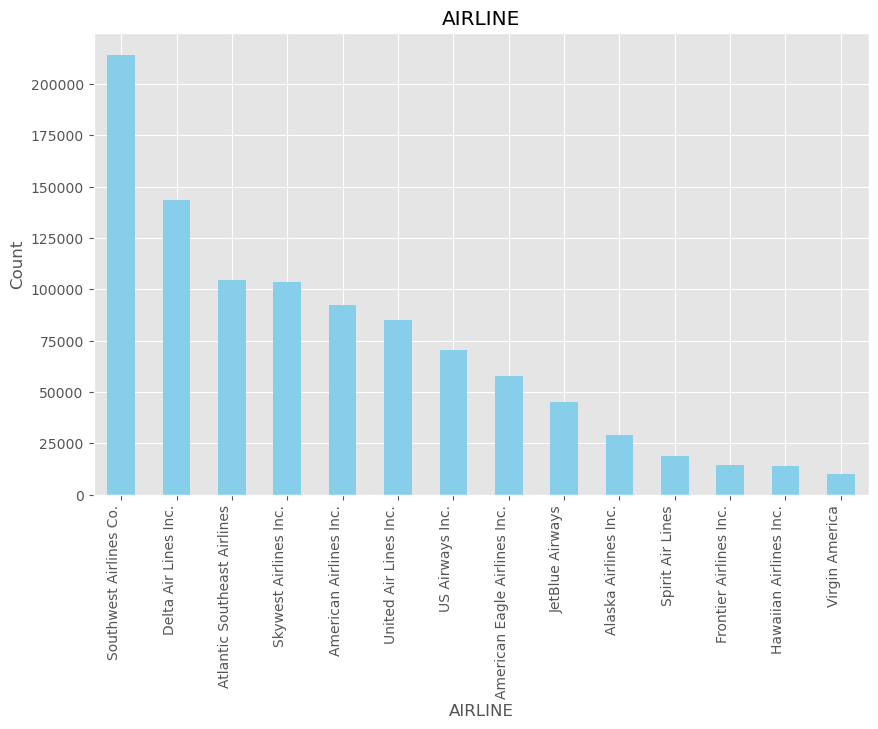

In [36]:
# Get the counts of each airlin

airline_counts = df["AIRLINE"].value_counts()
print(airline_counts)

# Plot a bar chart
plt.figure(figsize=(10, 6))
airline_counts.plot(kind='bar', color='skyblue')
plt.title('AIRLINE')
plt.xlabel('AIRLINE')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

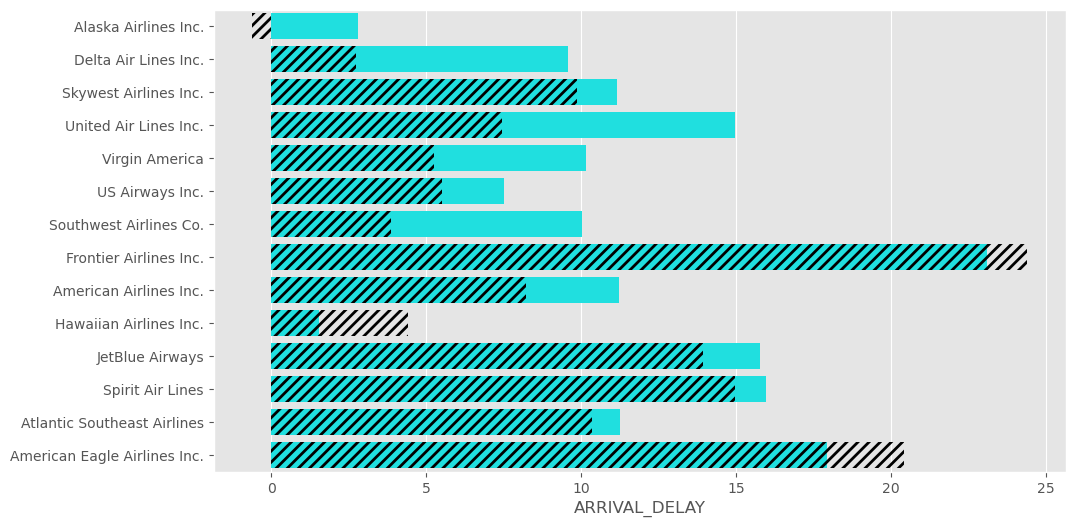

In [37]:

plt.rcParams['hatch.linewidth'] = 2.0 


fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=df, color="cyan", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=df, color="r", hatch = '///',
                 alpha = 0.0, ci=None)

ax.yaxis.label.set_visible(False)

###### Insights:
* The rate of Departure delay tend to be high compare to Arrival delay in all the airlines except for Hawaiian Airlines inc., American Eagle Airlines inc. and Frontier airlines.
* Alaska airline has no Arrival delay and the Departure delay is lessen compare to most of the airlines,this airline exhibit better performance in minimizing delays and adhering to scheduled departure and arrival times.
* Frontier airlines and American Eagle Airlines inc has the longer Departure delay and Arrival delay which may be trace down to operational challenges or inefficiencies in scheduling, maintenance, or air traffic management. 

In [38]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'IATA_CODE_x', 'AIRPORT_x',
       'CITY_x', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x', 'LONGITUDE_x',
       'IATA_CODE_y', 'AIRPORT_y', 'CITY_y', 'STATE_y', 'COUNTRY_y',
       'LATITUDE_y', 'LONGITUDE_y'],
      dtype='object')

In [39]:
df = df.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [40]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'Org_Airport_Code',
       'Org_Airport_Name', 'Origin_city', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x',
       'LONGITUDE_x', 'Dest_Airport_Code', 'Dest_Airport_Name',
       'Destination_city', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y',
       'LONGITUDE_y'],
      dtype='object')

In [41]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,DATE,AIRLINE,Org_Airport_Code,Org_Airport_Name,Origin_city,STATE_x,COUNTRY_x,LATITUDE_x,LONGITUDE_x,Dest_Airport_Code,Dest_Airport_Name,Destination_city,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,ANC,SEA,2015-01-01 00:45:00,00:41:00,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,05:09:00,04:55:00,-14.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
2,2015,1,1,4,134,N464AS,ANC,SEA,2015-01-01 01:55:00,01:40:00,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,06:33:00,05:58:00,-35.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,114,N303AS,ANC,SEA,2015-01-01 02:59:00,02:09:00,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,06:40:00,06:28:00,-12.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
4,2015,1,1,4,730,N423AS,ANC,SEA,2015-01-01 05:10:00,04:57:00,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,09:30:00,09:16:00,-14.0,0,0,2015-01-01,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


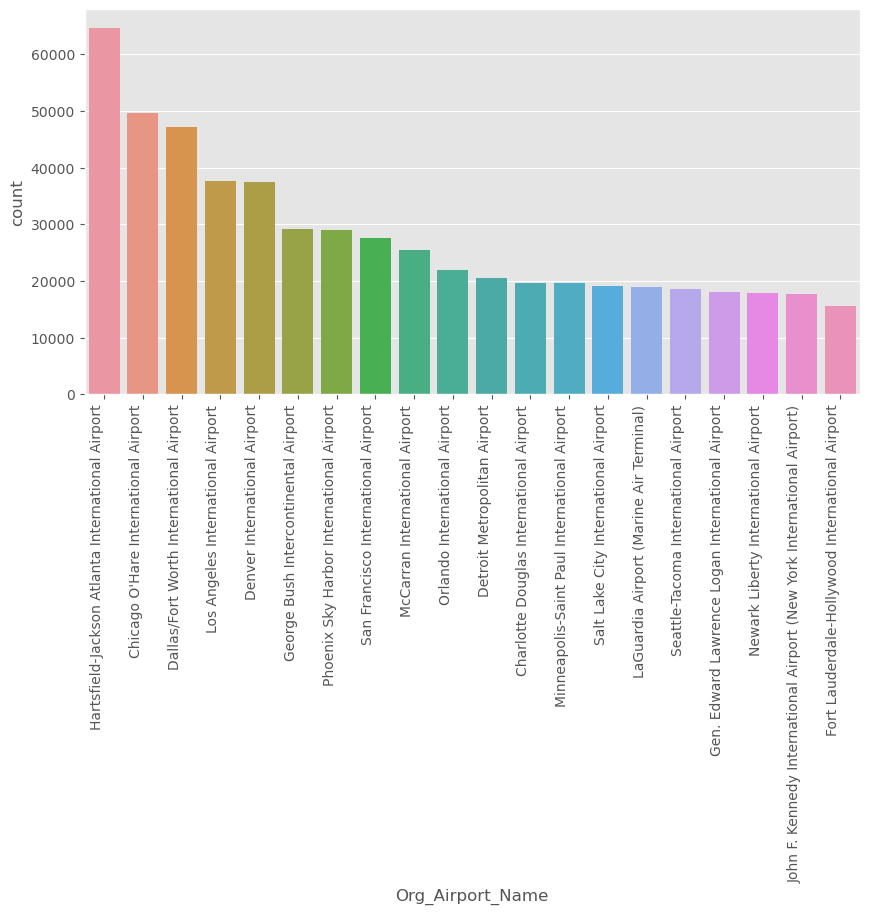

In [42]:
#the visualization of 20 most frequent airport
plt.figure(figsize=(10, 5))
axis = sns.countplot(x=df['Org_Airport_Name'], data = df,
              order=df['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

##### insights:
* the visualization of major hub airports that serve as primary departure points for a significant number of flights
    - Identifying hub airports is crucial for understanding air travel networks and passenger traffic flow.

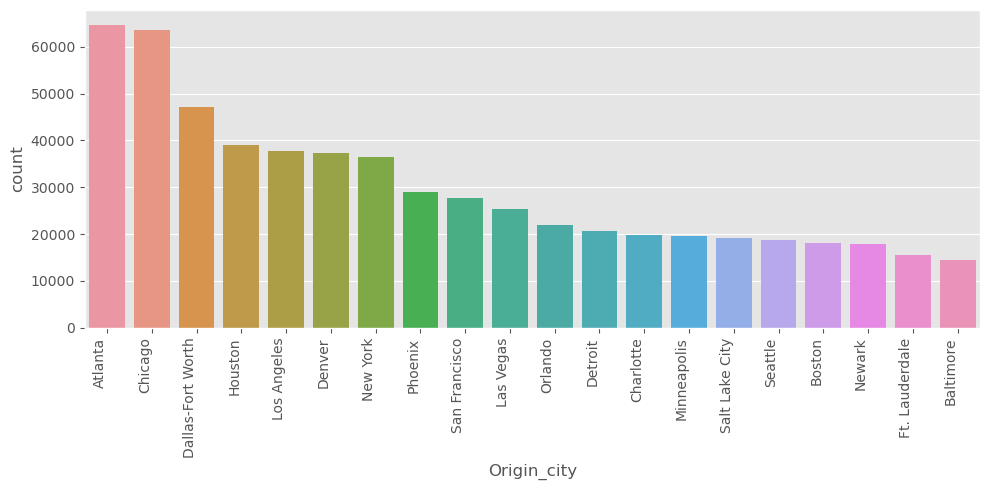

In [43]:
plt.figure(figsize=(10, 5))
axis = sns.countplot(x=df['Origin_city'], data = df,
              order=df['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [44]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'Org_Airport_Code',
       'Org_Airport_Name', 'Origin_city', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x',
       'LONGITUDE_x', 'Dest_Airport_Code', 'Dest_Airport_Name',
       'Destination_city', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y',
       'LONGITUDE_y'],
      dtype='object')

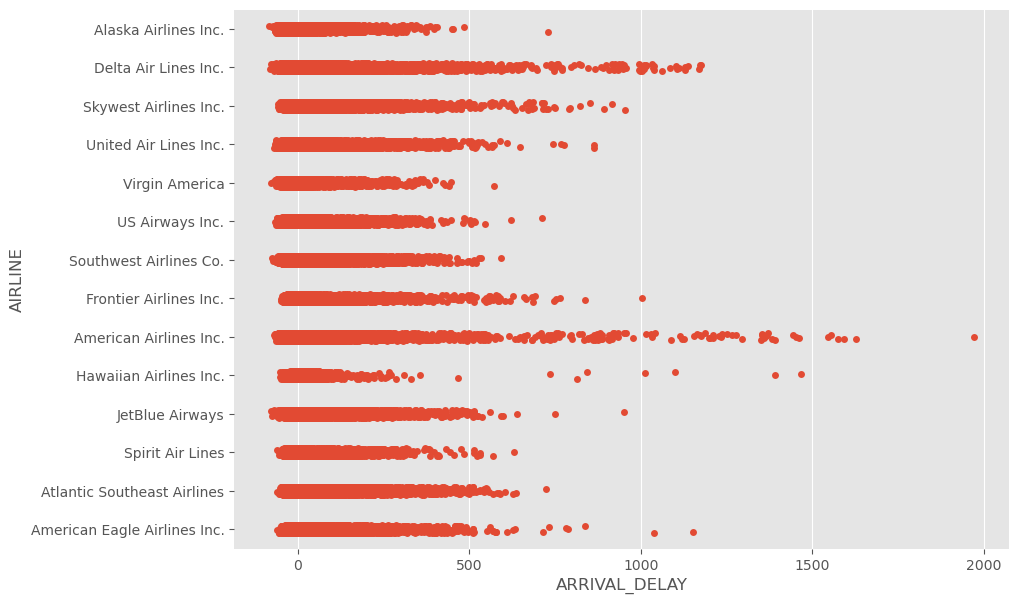

In [45]:
axis = plt.subplots(figsize=(10,7))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = df, dodge=True, jitter=True
            )
plt.show()

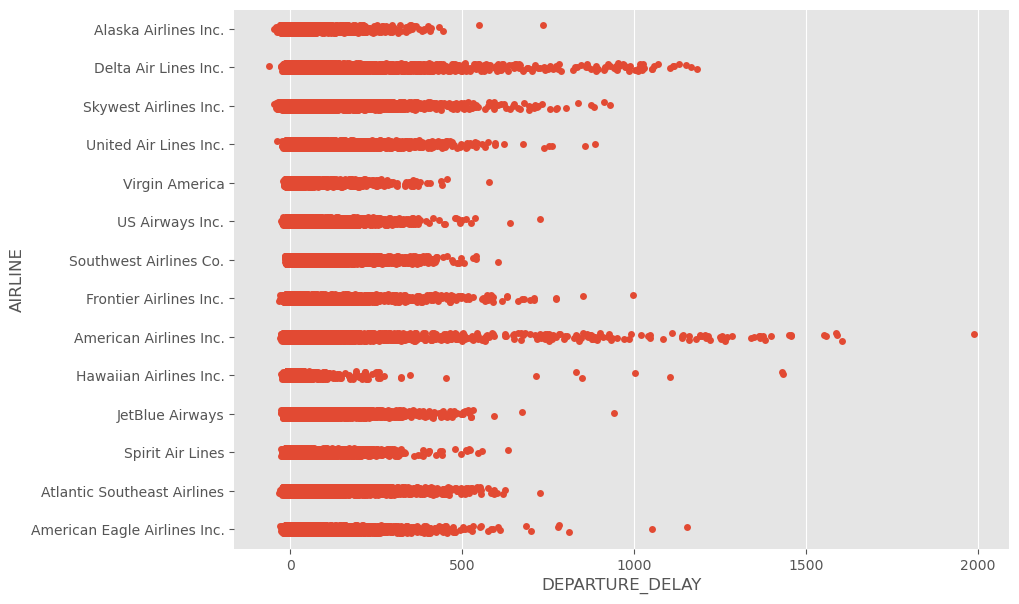

In [46]:
axis = plt.subplots(figsize=(10,7))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="DEPARTURE_DELAY", y="AIRLINE",
              data = df, dodge=True, jitter=True
            )
plt.show()

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: red)')]

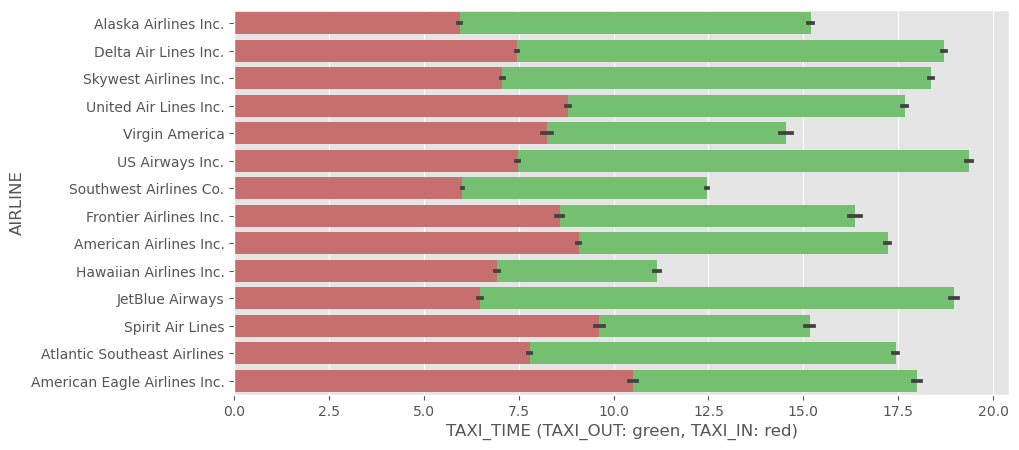

In [47]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,5))
sns.set_color_codes("muted")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=df, color="g")
axis = sns.barplot(x="TAXI_IN", y="AIRLINE", data=df, color="r")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: red)")

###### Insights:
* Delta Airlines inc,Skywest Airlines inc,United Airlines inc,US Airways inc,JetBlue Airways,American Eagle Airlines inc have high average times, which may suggest congestion or inefficiency in taxiing processes.
* Hawaiian Airlines,Southwest Airlines Co. have low average times, which may indicate efficiency in ground operations.
* Excessive taxi times can impact airline schedules and passenger satisfaction.

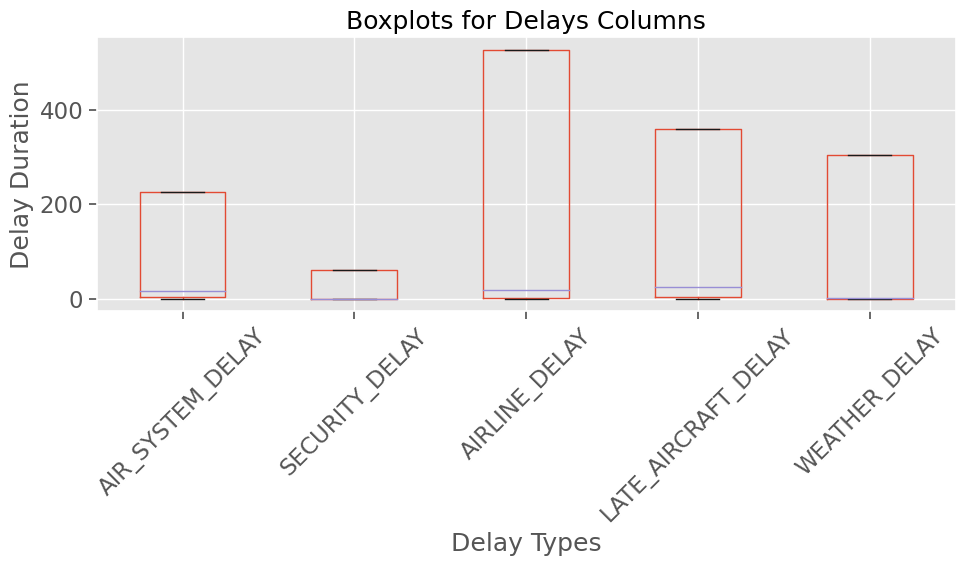

In [48]:
delays = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
df1.describe().boxplot(column=delays, showfliers=False)
plt.title('Boxplots for Delays Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.xlabel('Delay Types')
plt.ylabel('Delay Duration')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


###### Insights:
* it suggests that airline-related factors play a crucial role in causing delays.

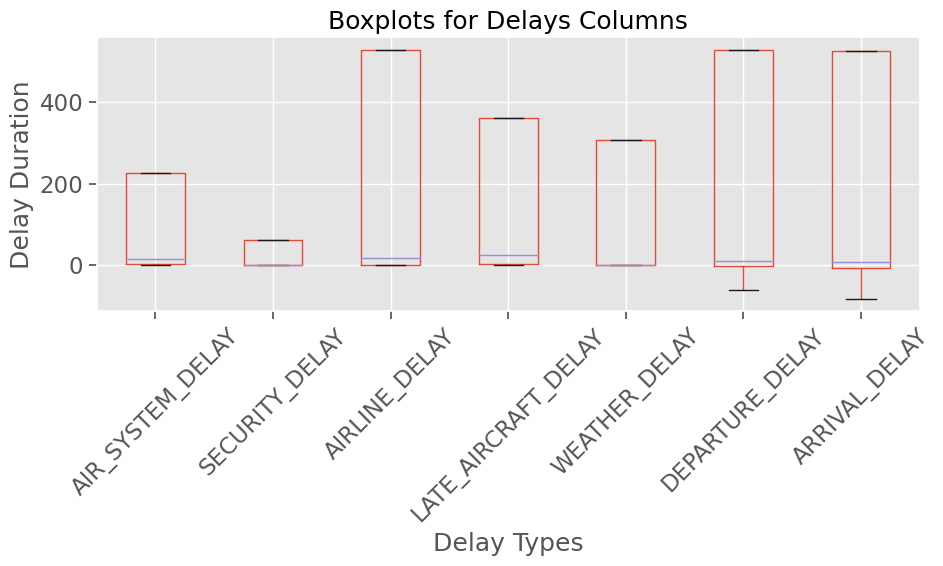

In [49]:
delays2 = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','DEPARTURE_DELAY','ARRIVAL_DELAY' ]

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
df1.describe().boxplot(column=delays2, showfliers=False)
plt.title('Boxplots for Delays Columns')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.xlabel('Delay Types')
plt.ylabel('Delay Duration')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


MONTH  CANCELLATION_REASON
1      A                        2874
       B                      465006
       C                        2087
       D                           1
2      A                        2815
       B                      424121
       C                        2254
       D                           1
3      A                        1285
       B                      147181
       C                         950
Name: ARRIVAL_DELAY, dtype: int64


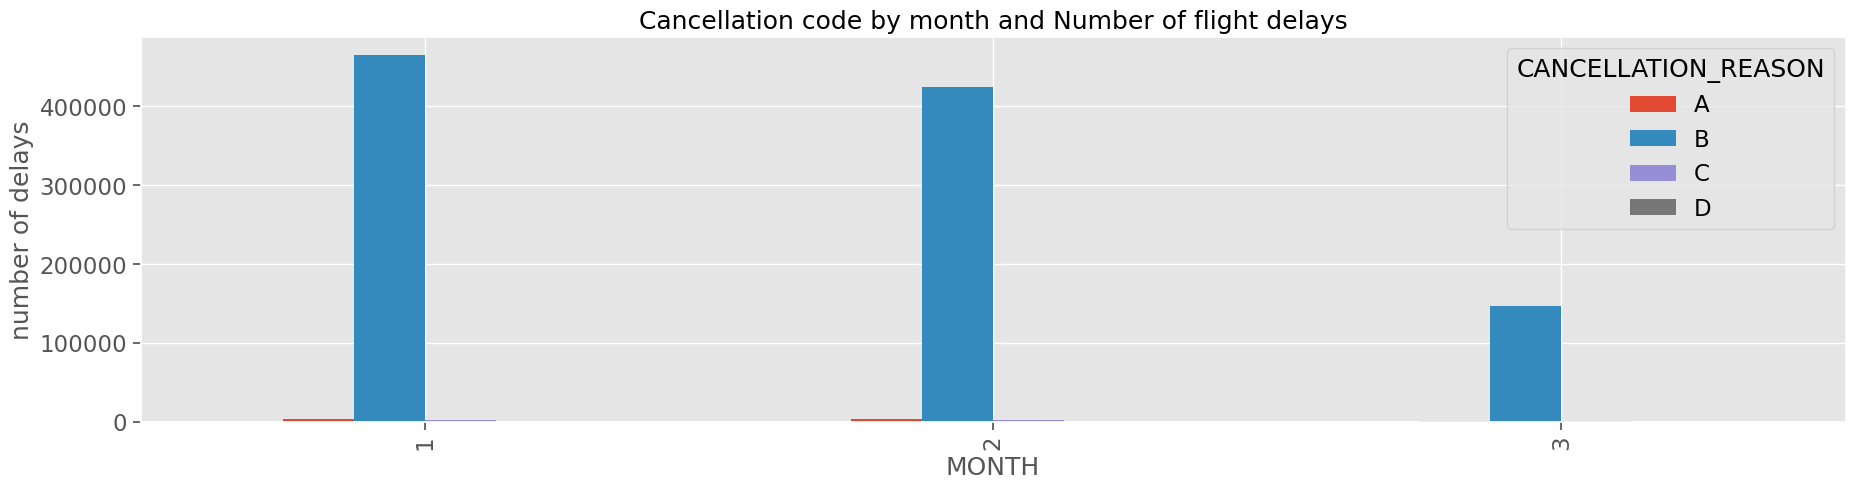

In [50]:
df1.groupby(by=['MONTH', 'CANCELLATION_REASON'])['ARRIVAL_DELAY'].count().unstack().plot.bar(figsize=(22,5))
plt.title('Cancellation code by month and Number of flight delays');
plt.ylabel('number of delays');
# Grouping by MONTH and CANCELLATION_REASON and counting the number of occurrences
cancellation_counts = df1.groupby(by=['MONTH', 'CANCELLATION_REASON'])['ARRIVAL_DELAY'].count()

# Printing the counts
print(cancellation_counts)


##### Insights:
* cancellation reasons; which may include A = carrier, B = weather, C = NAS, D = security
* National Aviation System (NAS): Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

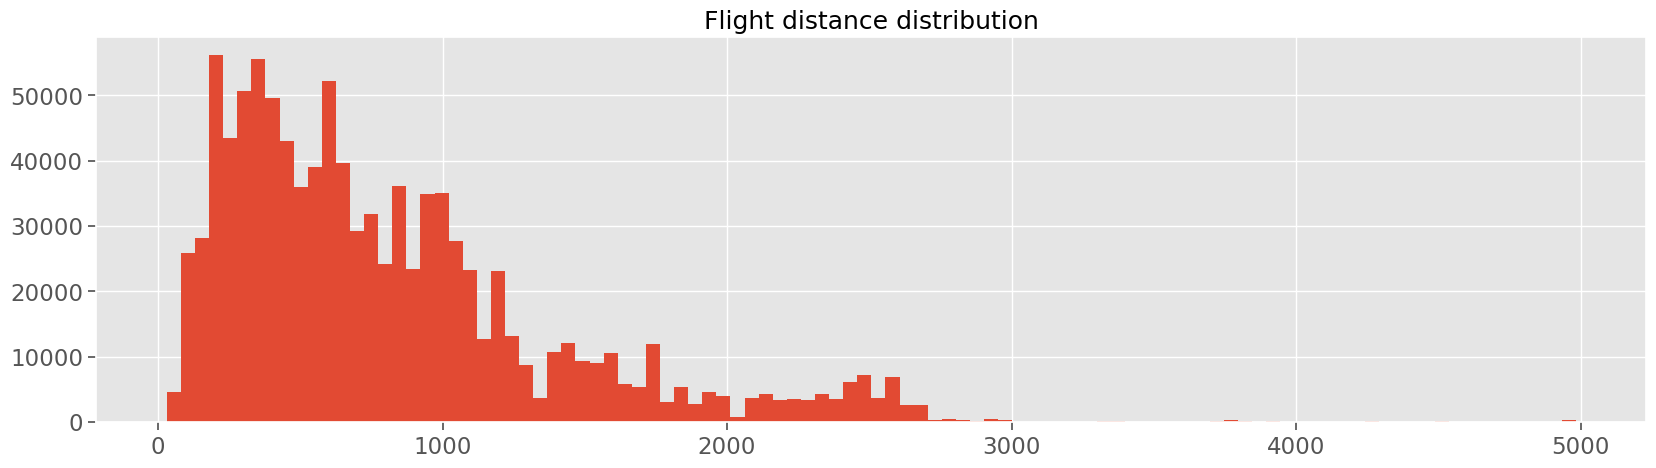

In [51]:
df['DISTANCE_BINS'] = pd.cut(df['DISTANCE'], 100)
plt.hist(df['DISTANCE'], bins=100)
plt.title('Flight distance distribution');

##### Insights:
* most of the flight distance distribution falls between the range of 0-1000 miles

In [53]:
df['DEPARTURE_DELAY_>0'] = df['DEPARTURE_DELAY'] > 0

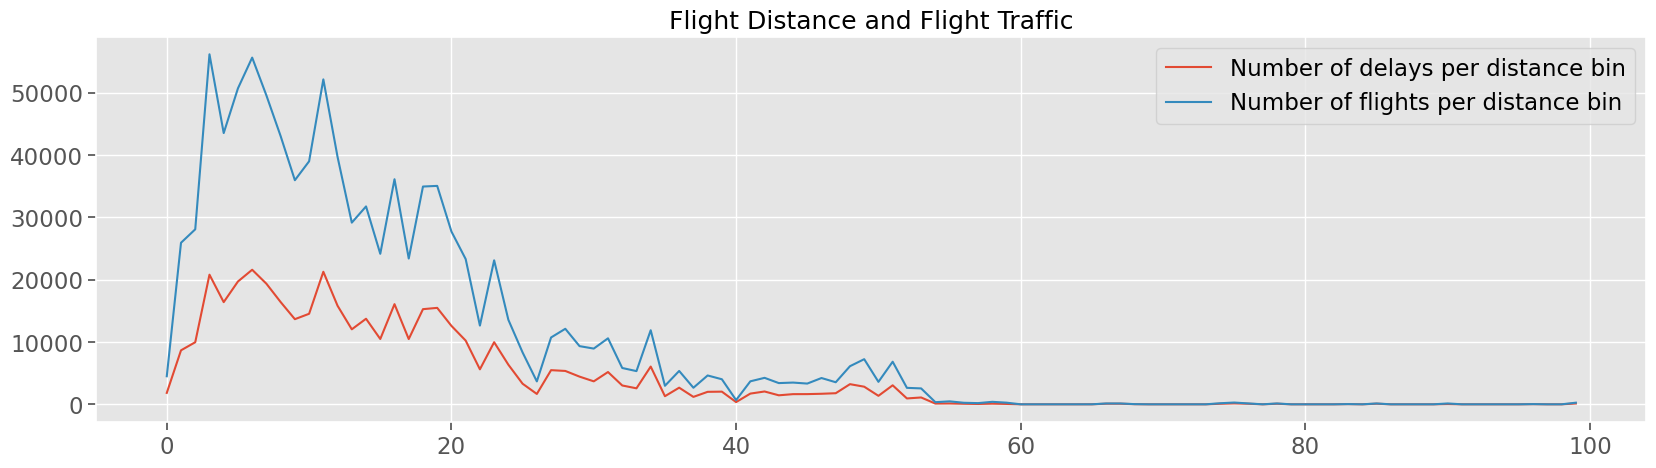

In [54]:
plt.plot(df.groupby(by='DISTANCE_BINS')['DEPARTURE_DELAY_>0'].sum().values, label='Number of delays per distance bin')
plt.plot(df.groupby(by='DISTANCE_BINS')['DEPARTURE_DELAY_>0'].count().values, label='Number of flights per distance bin')
plt.title('Flight Distance and Flight Traffic')
plt.legend();

##### Insights:
* shorter flights have more delays than longer delays


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [56]:
def analyze_period(period):
    scaler = StandardScaler()
    x = pd.DataFrame(df.groupby(by=period)['DATE'].count())
    x = scaler.fit_transform(x)
    x = x.reshape(-1,)
    scaler2 = StandardScaler()
    y = pd.DataFrame(df.groupby(by=period)['DEPARTURE_DELAY_>0'].sum())
    y = scaler2.fit_transform(y)
    y = y.reshape(-1,)

    display(pd.DataFrame(np.corrcoef(x, y)))

    
    plt.plot(x, label= f'flights per {period}')
    plt.plot(y, label=f'number of delays per {period}')
    
    plt.xlabel(f'{period}')
    plt.title(f'Number of Departure Delays by {period}')
    plt.legend();

,0,1
0,1.00000,0.99302
1,0.99302,1.00000


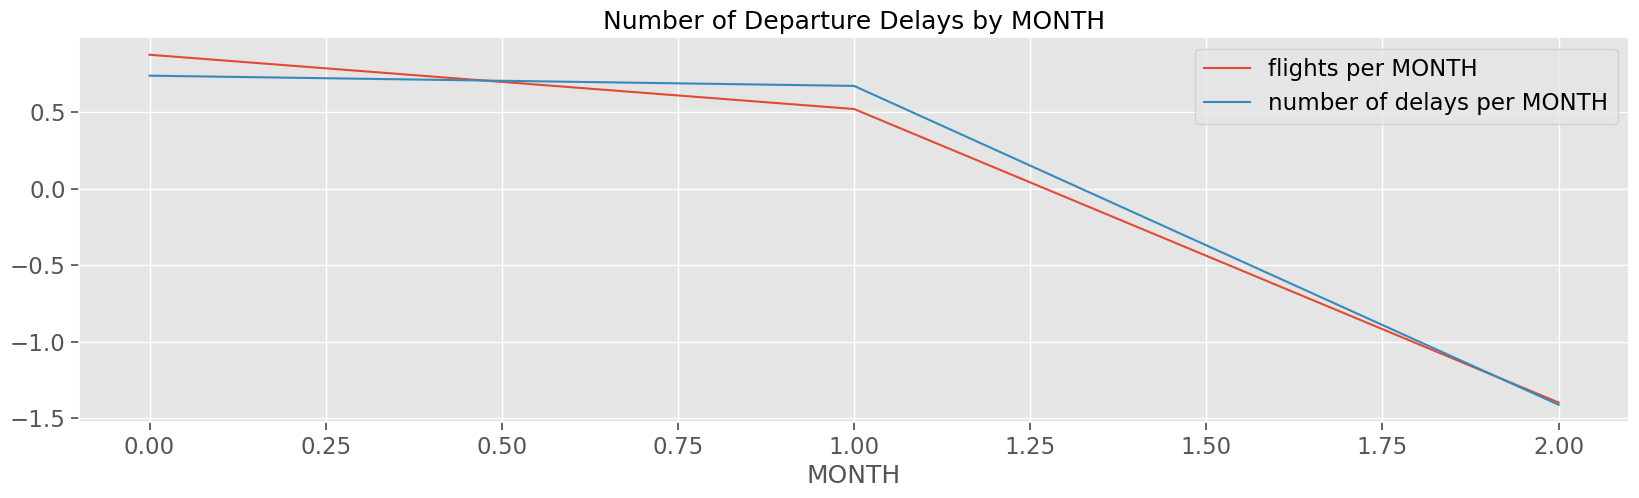

In [57]:
analyze_period('MONTH')

,0,1
0,1.000000,0.903362
1,0.903362,1.000000


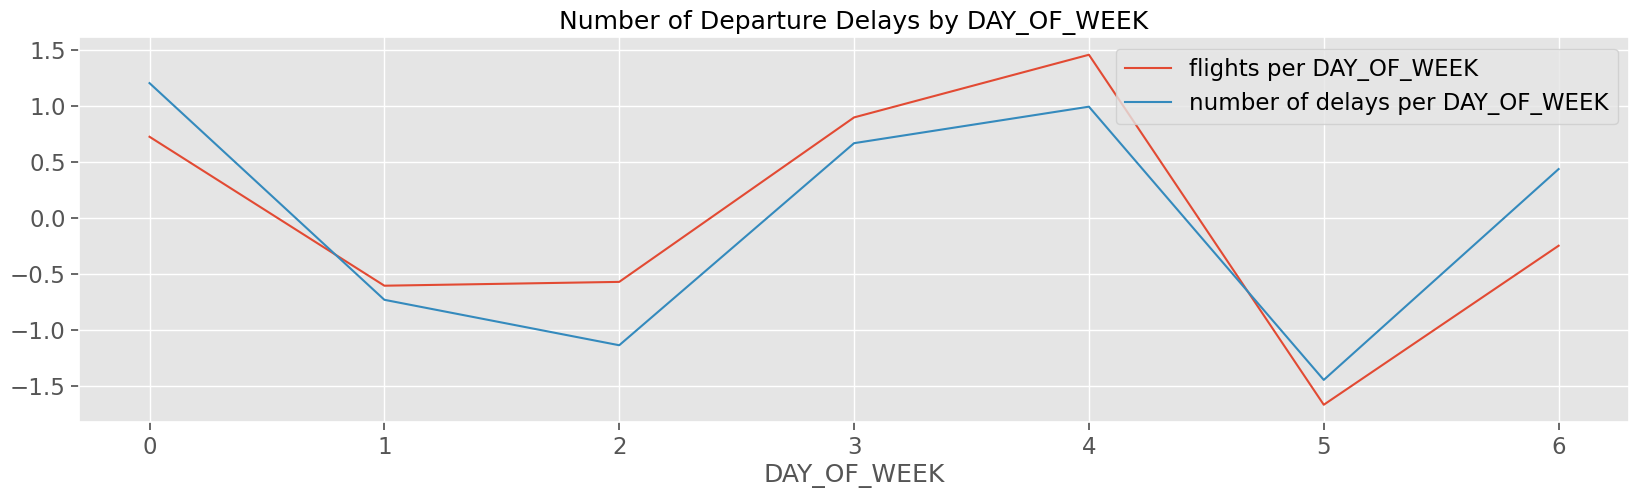

In [58]:
analyze_period('DAY_OF_WEEK')

,0,1
0,1.000000,0.948565
1,0.948565,1.000000


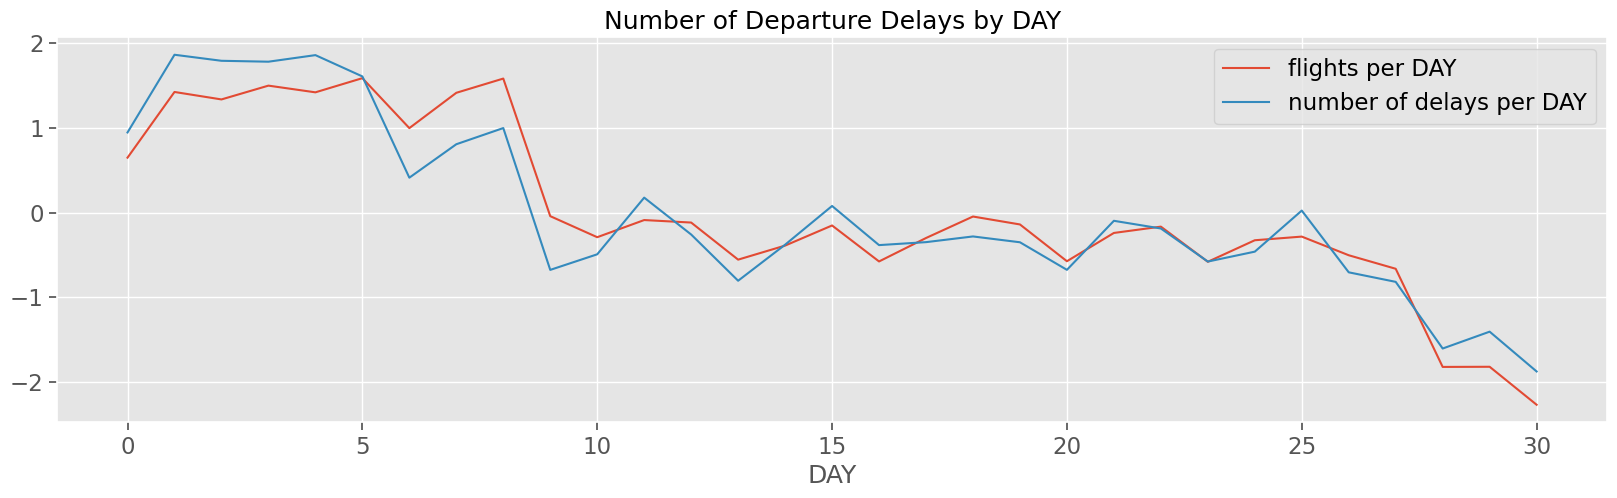

In [59]:
analyze_period('DAY')

##### Insight:
* For any given time-period, the mean departure delay is closely related to the number of flights occurring in that time

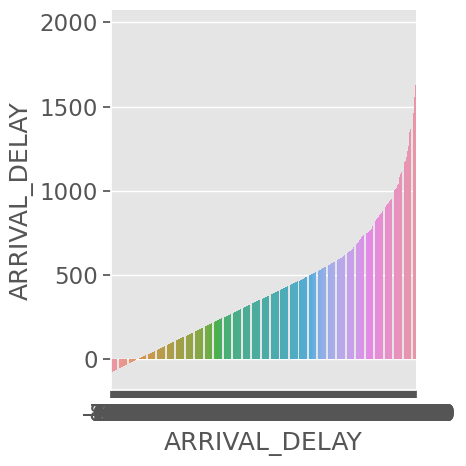

In [61]:
sns.catplot(x="ARRIVAL_DELAY",y="ARRIVAL_DELAY",kind='bar',data=df)

<AxesSubplot: xlabel='ARRIVAL_DELAY', ylabel='Count'>

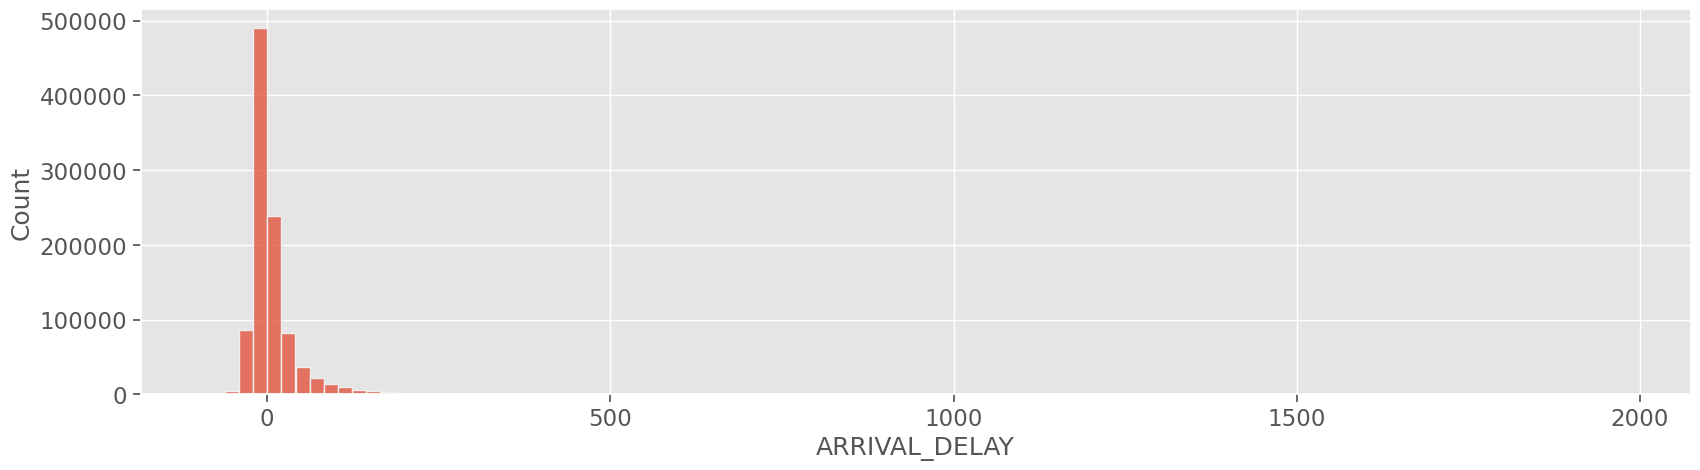

In [65]:
sns.histplot(df['ARRIVAL_DELAY'],bins=100)

# PREDICTION OF FLIGHT DELAY

In [68]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'Org_Airport_Code',
       'Org_Airport_Name', 'Origin_city', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x',
       'LONGITUDE_x', 'Dest_Airport_Code', 'Dest_Airport_Name',
       'Destination_city', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y',
       'DISTANCE_BINS', 'DEPARTURE_DELAY_>0'],
      dtype='object')

In [86]:
df_pred = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']]

In [91]:
df_pred.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015,1,1,4,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0
1,2015,1,1,4,108,ANC,SEA,2015-01-01 00:45:00,00:41:00,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,05:09:00,04:55:00,-14.0
2,2015,1,1,4,134,ANC,SEA,2015-01-01 01:55:00,01:40:00,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,06:33:00,05:58:00,-35.0
3,2015,1,1,4,114,ANC,SEA,2015-01-01 02:59:00,02:09:00,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,06:40:00,06:28:00,-12.0
4,2015,1,1,4,730,ANC,SEA,2015-01-01 05:10:00,04:57:00,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,09:30:00,09:16:00,-14.0


In [87]:
df_pred.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,-0.342730,-0.037168,-0.010059,0.043364,0.009721,-0.001321,0.003631,0.006759,0.004955,0.005265,-0.006713,0.007253,0.045545
DAY,NaN,-0.342730,1.000000,0.022441,0.014574,-0.072929,-0.007901,-0.012446,-0.008033,-0.014981,-0.011691,-0.010452,0.000865,-0.029684,-0.079525
DAY_OF_WEEK,NaN,-0.037168,0.022441,1.000000,0.013423,-0.001398,-0.021325,0.012289,0.019019,0.016282,0.019655,0.020778,0.007791,0.000930,-0.006481
FLIGHT_NUMBER,NaN,-0.010059,0.014574,0.013423,1.000000,0.010263,0.042334,0.009860,-0.329665,-0.318697,-0.333536,-0.346306,-0.014991,-0.003346,0.035349
DEPARTURE_DELAY,NaN,0.043364,-0.072929,-0.001398,0.010263,1.000000,0.091113,0.168217,0.024764,0.034374,0.019848,0.019345,0.074556,0.031443,0.941613
TAXI_OUT,NaN,0.009721,-0.007901,-0.021325,0.042334,0.091113,1.000000,-0.031799,0.100582,0.211714,0.076839,0.058172,-0.040902,0.012343,0.277588
WHEELS_OFF,NaN,-0.001321,-0.012446,0.012289,0.009860,0.168217,-0.031799,1.000000,-0.041878,-0.040863,-0.034005,-0.031969,0.735183,-0.040722,0.158257
SCHEDULED_TIME,NaN,0.003631,-0.008033,0.019019,-0.329665,0.024764,0.100582,-0.041878,1.000000,0.981872,0.990024,0.978013,0.032899,0.069799,-0.028902
ELAPSED_TIME,NaN,0.006759,-0.014981,0.016282,-0.318697,0.034374,0.211714,-0.040863,0.981872,1.000000,0.986968,0.963570,0.033052,0.139656,0.044065


<AxesSubplot: >

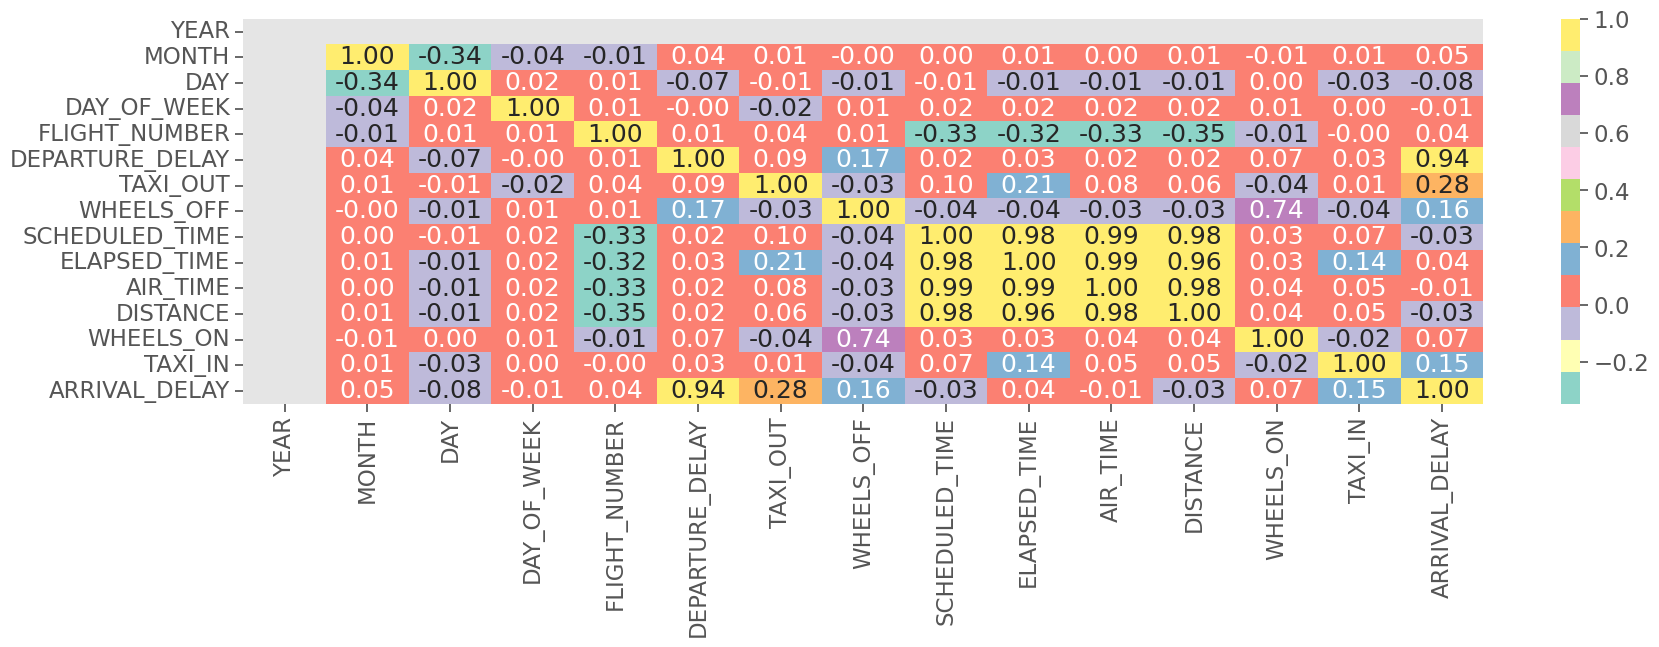

In [88]:
sns.heatmap(data=df_pred.corr(),annot=True, fmt='.2f',cmap='Set3')

###### Insights:
- Considering the correlation values, the variables that seem most promising for predicting ARRIVAL_DELAY are:

    * DEPARTURE_DELAY: Strong positive correlation
    * TAXI_OUT, WHEELS_OFF, TAXI_IN: Moderate positive correlation
    * SCHEDULED_TIME, ELAPSED_TIME, AIR_TIME, DISTANCE: Low to moderate positive correlation
    * FLIGHT_NUMBER: Moderate positive correlation

In [ ]:
cancellation_counts = df1.groupby(by=['MONTH', 'CANCELLATION_REASON'])['ARRIVAL_DELAY'].count()

In [107]:
can = df.groupby(by=['ORIGIN_AIRPORT'])['ORIGIN_AIRPORT'].count()
print(can)

ORIGIN_AIRPORT
ABE     372
ABI     472
ABQ    3406
ABR     134
ABY     177
       ... 
VPS     820
WRG     130
XNA    1655
YAK     129
YUM     374
Name: ORIGIN_AIRPORT, Length: 312, dtype: int64


In [109]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'DATE', 'AIRLINE', 'Org_Airport_Code',
       'Org_Airport_Name', 'Origin_city', 'STATE_x', 'COUNTRY_x', 'LATITUDE_x',
       'LONGITUDE_x', 'Dest_Airport_Code', 'Dest_Airport_Name',
       'Destination_city', 'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y',
       'DISTANCE_BINS', 'DEPARTURE_DELAY_>0'],
      dtype='object')

In [110]:
print(df[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']].dtypes)

ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
dtype: object


In [ ]:
x = df[['FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','DISTANCE','WHEELS_ON',
       'TAXI_IN']]

In [113]:
#print(df['ORIGIN_AIRPORT'].unique())
print(df['DESTINATION_AIRPORT'].unique())

['SEA' 'PDX' 'OTZ' 'SCC' 'JNU' 'PHX' 'OGG' 'OME' 'BET' 'HNL' 'ADK' 'ORD'
 'LAS' 'FAI' 'LAX' 'KOA' 'ADQ' 'CDV' 'BRW' 'MSP' 'SFO' 'DEN' 'IAH' 'ANC'
 'SJC' 'OAK' 'SNA' 'SAN' 'SLC' 'PSP' 'DFW' 'SMF' 'ONT' 'KTN' 'BUR' 'EWR'
 'GEG' 'MCO' 'DCA' 'BWI' 'TPA' 'PHL' 'LIH' 'FLL' 'DTW' 'BOS' 'ATL' 'TUS'
 'MCI' 'MSY' 'ABQ' 'SAT' 'STL' 'AUS' 'BLI' 'MIA' 'JFK' 'CLT' 'CVG' 'IAD'
 'LGB' 'FAT' 'OMA' 'SBA' 'COS' 'JAC' 'BZN' 'HDN' 'MDW' 'MKE' 'BOI' 'PBI'
 'EGE' 'CMH' 'IND' 'BNA' 'RDU' 'PIT' 'MEM' 'CLE' 'ITO' 'CLD' 'ASE' 'ELP'
 'MRY' 'RNO' 'SAF' 'SBP' 'EUG' 'SMX' 'ICT' 'RDM' 'OKC' 'MTJ' 'DAL' 'HOU'
 'DSM' 'YUM' 'FLG' 'GJT' 'DRO' 'BFL' 'LIT' 'SDF' 'TUL' 'BUF' 'LGA' 'RSW'
 'BIL' 'GRR' 'PUB' 'BIS' 'JMS' 'FCA' 'MLI' 'FAR' 'SGF' 'FSD' 'MOT' 'RAP'
 'BHM' 'GTF' 'SGU' 'CPR' 'SUN' 'HYS' 'IDA' 'PSC' 'MFR' 'CID' 'RKS' 'LAR'
 'MAF' 'MSO' 'AMA' 'LNK' 'COD' 'PIA' 'HLN' 'GCC' 'MSN' 'MMH' 'DAY' 'ISN'
 'XNA' 'GUC' 'LFT' 'HSV' 'SHV' 'LBB' 'DIK' 'TYS' 'PHF' 'BMI' 'MDT' 'GSO'
 'CAK' 'JAX' 'BDL' 'CDC' 'CNY' 'BTM' 'PIH' 'VEL' 'E

In [ ]:
#identify the key predictor features in the dataset
from sklearn.ensemble import RandomForestClassifier

feat_model = RandomForestClassifier()

#fits model
feat_model.fit(df_scaled,y)
feature_names = list(df_scaled.columns)
importance = feat_model.feature_importances_
indices = np.argsort(importance)

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)),importance[indices],color='green', align="center")
plt.yticks(range(len(indices)),[feature_names[i] for i in indices])
plt.xlabel("relative importance")
plt.show()

In [119]:
df_p = df[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']]

In [116]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

In [117]:
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data_onehot = onehot_encoder.fit_transform(pd.DataFrame(df_p['ORIGIN_AIRPORT']))

In [118]:
df_p.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME
0,2015,1,1,4,98,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00
1,2015,1,1,4,108,ANC,SEA,2015-01-01 00:45:00,00:41:00,-4.0,17.0,58.0,204.0,194.0,173.0,1448,451.0,4.0,05:09:00,04:55:00
2,2015,1,1,4,134,ANC,SEA,2015-01-01 01:55:00,01:40:00,-15.0,17.0,157.0,218.0,198.0,170.0,1448,547.0,11.0,06:33:00,05:58:00
3,2015,1,1,4,114,ANC,SEA,2015-01-01 02:59:00,02:09:00,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,06:40:00,06:28:00
4,2015,1,1,4,730,ANC,SEA,2015-01-01 05:10:00,04:57:00,-8.0,16.0,513.0,205.0,199.0,179.0,1448,912.0,4.0,09:30:00,09:16:00


In [114]:
y = df['ARRIVAL_DELAY']